In [1]:
import pandas as pd
from pathlib import Path

from data.points import ANCHORS
# filename = "data/movement/2023-05-24-13:52:11.266488_P3-1-6-5_normalized_high_up.csv"
# filename = "/home/piotr/Documents/mgr/uwb-rs/data-processing/data/movement/2023-05-24-12:32:40.823901_P3-1-6-5_normalized.csv"
# filename = "data/movement/2023-05-24-14:18:43.048591P3-1-6-5_high_los.csv"
# filename = "data/movement/2023-05-24-14:35:08.828772P3-1-6-5_high_los.csv"
filename = "/home/piotr/Documents/mgr/uwb-rs/data-processing/data/movement/2023-06-23-13:55:53.175807slide-4anchors.csv"
df = pd.read_csv(filename, index_col=0)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df[df.anchor.isin(ANCHORS.keys())]
df = df.set_index("timestamp")

In [2]:
n_anchors = df["anchor"].nunique()
anchors = df["anchor"].unique()

In [3]:
# Create column for every anchor
reference_dist = df["reference_distance"].rolling(window=n_anchors, step=n_anchors).mean()
df = df.pivot(columns="anchor", values="distance").fillna(0).rolling(window=n_anchors, step=n_anchors).sum().dropna()
df["reference_distance"] = reference_dist

In [4]:
# Simple filtering
# df=df.rolling(window=n_anchors).mean().dropna()

anchor,0x26bd,0x5601,0x6c0d,reference_distance
timestamp,,,,
2023-06-23 13:55:53.831558,3593.8296,4288.8955,2115.2312,109.690984
2023-06-23 13:55:54.352682,3592.2637,4278.4850,2076.9004,109.448377
2023-06-23 13:55:54.874570,3625.1610,4250.6530,2085.3050,110.004465
2023-06-23 13:55:55.393396,3571.7010,4286.0234,2111.1445,111.240669
2023-06-23 13:55:55.911334,3533.2480,4281.5757,2157.5989,115.370437
2023-06-23 13:55:56.437342,3500.1958,4257.8384,2150.2544,119.376175
2023-06-23 13:55:56.952512,3463.9219,4221.9710,2182.8652,124.781672
2023-06-23 13:55:57.470737,3427.2668,4170.8220,2122.3540,129.731941
2023-06-23 13:55:57.995821,3407.9973,4151.2446,2180.1560,133.095725


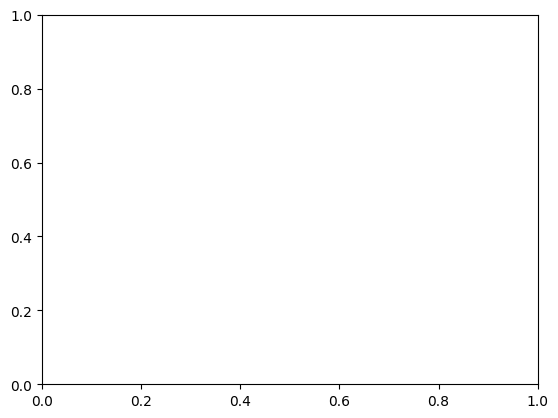

In [5]:
from easy_trilateration.model import *
from easy_trilateration.least_squares import easy_least_squares, solve_history
from easy_trilateration.graph import *
from helpers import distance

history = []
display(df)

for timestamp, row in df.iterrows():
    c = [Circle(*ANCHORS[anchor], row[anchor]) for anchor in anchors]
    history.append(Trilateration(c))

solve_history(history)


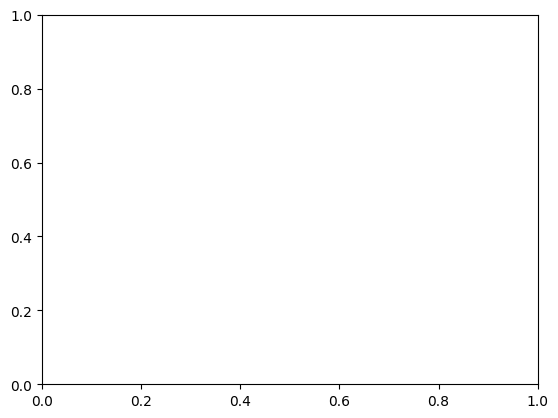

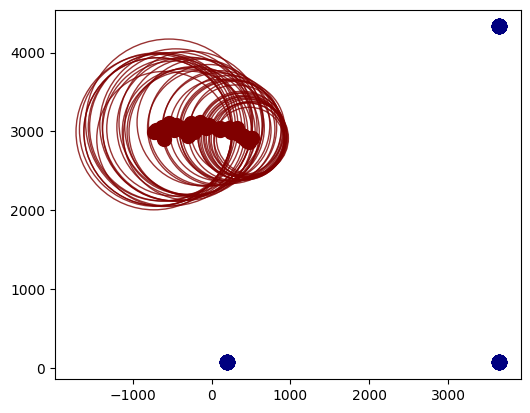

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

ax = plt.subplot()
ax.add_line(Line2D((1560,-5000),(1560,5000)))
a = animate(history, ax)
with open("video.html", "w") as file:
    file.write(a.to_html5_video())


In [7]:
data = {
    "x": [],
    "y": [],
    "radius": [],
    "timestamp": df.index.to_list()
}
for t in history:
    t: Trilateration
    data["x"].append(t.result.center.x)
    data["y"].append(t.result.center.y)
    data["radius"].append(t.result.radius)

df = pd.DataFrame(data)

In [8]:
import plotly.graph_objects as go
import plotly.express as px

anchors_df = pd.DataFrame(ANCHORS, index=["x","y"]).transpose()

trace = px.scatter(df, x="x", y="y")
anchors = px.scatter(anchors_df, x="x", y="y")

fig = go.Figure(trace.data + anchors.data)
fig.update_xaxes(range=[-100,3600])
fig.update_yaxes(range=[-1000,4600])
fig.update_layout(width=700, height=700)
fig.show()

In [9]:
px.scatter(df, x="x", y="y", animation_frame="timestamp",
        #    size="radius",
        #    range_x=[0,2000], range_y=[0,4000],
           range_x=[0,1500], range_y=[2100,2400],
        #    width=300, height=600)
           width=900, height=600)

In [10]:
orig = pd.read_csv(filename, index_col=0)
orig["timestamp"] = pd.to_datetime(orig["timestamp"])
orig["reference_distance"] *= 10 # cm to mm
orig["reference_distance"] -= 200 # Wall to (0,0)
df = orig.merge(df, on="timestamp")
# display(df)
df[["timestamp", "acc_x", "acc_y", "acc_z", "x", "y", "radius", "reference_distance"]].to_csv(f"data/triangulated/{Path(filename).name}")
